In [ ]:
import matplotlib.pyplot as plt
import random
import math as mt
import numpy as np
import tqdm.notebook as tqdm
import time 
import scipy.stats as stats

In [ ]:
def get_theta(pi, fit, pit_1):
    return (pi**2)*(fit/pit_1)-fit*pi

In [ ]:
def get_rbar_t(pi, fit):
    return fit*pi

In [ ]:
def get_rt(pi, demand):
    return demand*pi

In [ ]:
def get_mt(theta, lam, noise_var):
    return (theta**2)/noise_var+lam

In [ ]:
def get_mt_bt(rev, rev_bar, theta, noise_var):
    return  (rev-rev_bar)*theta/noise_var

In [ ]:
def get_sigma(sig_t1, mt):
    sig_t1_inv = 1/sig_t1
    res = sig_t1_inv + mt
    return 1/res

In [ ]:
def get_mu(sig_t1, mt, mu_t1, rev, rev_bar, theta, noise_var):
    sig_t = get_sigma(sig_t1, mt)
    sig_t1_inv = 1/sig_t1
    mu_t = sig_t*(sig_t1_inv*mu_t1 + get_mt_bt(rev, rev_bar, theta, noise_var))
    return mu_t

In [ ]:
def get_forecast(beta, prev_bd):
    c0 = 1e-4
    et = np.random.normal(0, 1, 1)
    ft = c0 + beta*prev_bd + et
    return ft

In [ ]:
def get_demand(price, prev_price, initial_elasticity, fit):
    et = np.random.normal(0, 1, 1)
    a = fit*((price/prev_price)**initial_elasticity)
    dt = max(a, 0)
    return dt

In [ ]:
def get_price(fit, prev_price, constraint_set, elasticity):
    revs = (constraint_set**2)*fit*elasticity/prev_price - constraint_set*fit*(elasticity-1)
    idx = np.argmax(revs)
    return constraint_set[idx]

In [ ]:
def max_rev_ts(initial_price, initial_elasticity, initial_demand, time_h, noise_var, constraint_set):

    revenue = np.zeros(time_h)

    lam = 1e-4
    price =  initial_price
    demand = initial_demand
    elast_t = -2
    theta = 0
    forecast = 1e-4 + np.random.normal(0, 1, 1) + initial_demand
    
    prev_bd = demand
    prev_price = price
    sig_t1 = 0
    mt = get_mt(theta, lam, noise_var)
    mu_t1 = 0

    rev = get_rt(price, demand)
    rev_bar = get_rbar_t(price, forecast)

    mu = -2
    sig = 6

    for t in tqdm.tqdm(range(1, time_h+1)):

        while True:
            samp = np.random.normal(mu, sig, 1)
            elast_t = samp
            if elast_t <0 :
                break

        forecast = get_forecast(0.5, prev_bd)
        price = get_price(forecast, prev_price, constraint_set, elast_t)
        demand = get_demand(price, prev_price, initial_elasticity, forecast)

        rev = get_rt(price, demand)
        rev_bar = get_rbar_t(price, forecast)

        revenue[t-1] = rev

        sig_t1 = sig
        mu_t1 = mu
        theta = get_theta(price, forecast, prev_price)
        mt = get_mt(theta, lam, noise_var)

        mu = get_mu(sig_t1, mt, mu_t1, rev, rev_bar, theta, noise_var)
        sig = get_sigma(sig_t1, mt)
        prev_bd = 0.5*prev_bd + demand
        prev_price = price

    return mu, revenue


Item no:0 is going on



Item no:1 is going on



Item no:2 is going on



Item no:3 is going on



Item no:4 is going on


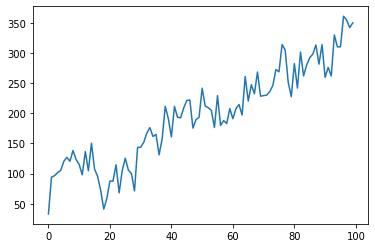

In [ ]:
time_h = 100
items = 5
noise_var = 1.4
np.random.seed(4)
initial_elasticity = np.random.uniform(-3, -1, size=items)
initial_demand = np.random.uniform(1.5, 4, size=items)
p_set = np.array([[12, 15, 16],
                  [12, 16, 13],
                  [14, 15, 12],
                  [12, 18, 19],
                  [12, 13, 17]   
                ])
initial_price = 12

revenue = np.zeros(time_h)
for ite in range(items):
    print("Item no:{} is going on".format(ite))
    mu, rev = max_rev_ts(initial_price, initial_elasticity[ite], initial_demand[ite], time_h, noise_var, p_set[ite, :])
    revenue = revenue + rev

plt.figure()
plt.plot(revenue)
plt.show()

In [ ]:
print(initial_demand, initial_elasticity)

[2.04022374 3.94068614 1.51557564 2.13245591 2.58697883] [-1.06594032 -1.9055355  -1.05463128 -1.57036801 -1.60454235]
